# Working with DataFrames

Now we will go to a territory which might be somewhat familiar if you have previously used R (or Matlab). We will import some packages, read the contents of a file and store it in a data-frame.

## Importing packages

One of the great things about python that very often you don 't have to implement something yourself. It may be already implemented in the many freely accessible python packages, often referred to as the python ecosystem.

If you are working on your local computer, you can install python packages e.g. with the tools [pip](https://pip.pypa.io/en/stable/getting-started/) or [conda](https://docs.conda.io/en/latest/).

Inside a notebook, hosted on the cloud (e.g. Google Colab), you can install packages via the following code.

In [1]:
!pip install pandas nilearn

You should consider upgrading via the '/home/tspisak/src/RPN-signature/venv/bin/python -m pip install --upgrade pip' command.


```{margin} Dependencies in Binder
When launching this notebook interactively via Binder, all dependnecies will already be installed, so this command will have no actual effect. On Google Coleb, there are no costum packages installed, so the rest of this notebook will not function without running this command.
```

This command installed two packages needed for the rest of this notebook: [pandas](https://pandas.pydata.org/) and [nilearn](https://nilearn.github.io/stable/index.html).

Once a package is installed on the system, the only thing we must do is to import the packages, in order to tell python that we intend to use it in your code.

Now, we will import the package called [pandas](https://pandas.pydata.org/), a package that provides powerful R-like dataframes to store and manipulate your data.
For convenience, we also specify that from now on, we would like to refer to pandas as pd, for short.

In [2]:
import pandas as pd

## Loading some data

Now let's load some example data. Throughout the book, we will use brain cortical volume and thickness data obtained from the publicly available ["Information eXtraction from Images" (IXI) dataset](https://brain-development.org/ixi-dataset/)

```{margin} License info
The IXI dataset is made available under the Creative Commons [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/) license. If you use the IXI data please acknowledge the source of the IXI data.
```

```{seealso}
See supplement X for how raw IXI anatomical MRI data was processed with [Freesurfer](https://surfer.nmr.mgh.harvard.edu/).
For more information on analyzing anatomical MR images with Freesurfer e.g. on [Andy's blog](https://www.andysbrainblog.com/andysbrainblog/2018/11/27/introduction-to-freesurfer).
```

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/pni-lab/predmod_lecture/master/ex_data/IXI/ixi.csv")
df


,ID,Age,lh_bankssts_volume,lh_caudalanteriorcingulate_volume,lh_caudalmiddlefrontal_volume,lh_cuneus_volume,lh_entorhinal_volume,lh_fusiform_volume,lh_inferiorparietal_volume,lh_inferiortemporal_volume,...,rh_rostralanteriorcingulate_volume,rh_rostralmiddlefrontal_volume,rh_superiorfrontal_volume,rh_superiorparietal_volume,rh_superiortemporal_volume,rh_supramarginal_volume,rh_frontalpole_volume,rh_temporalpole_volume,rh_transversetemporal_volume,rh_insula_volume
0,2,35.800137,2188,2368,6562,2459,1561,9281,14136,10797,...,2555,17309,21210,12291,12287,10848,1033,2269,1170,6915
1,12,38.781656,2717,2626,6621,3170,2835,8870,14813,11961,...,3260,19044,24651,13871,13948,11975,1100,2865,1167,6941
2,13,46.710472,2101,2488,5437,2347,1859,9200,16900,11675,...,2682,17653,23804,10977,12931,15127,975,2099,1032,7395
3,14,34.236824,1925,1983,5153,2497,2207,7686,12786,8433,...,2120,15070,21001,10993,10890,10453,891,2122,958,6063
4,15,24.284736,2535,1802,5461,2496,1875,6859,14187,7897,...,2825,13027,21865,10651,12686,11400,1185,2207,1344,8218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,648,47.723477,2009,2270,5439,2684,1729,9029,13407,10971,...,3236,15464,21427,11524,12869,11373,814,2419,1360,7423
634,651,50.395619,1776,1532,5797,2954,1992,9131,13201,9005,...,2146,11883,18137,13668,10833,8420,751,2304,1010,6032
635,652,42.989733,2315,1898,6234,3285,1857,10453,15412,10639,...,2931,16905,25113,13148,14489,13440,731,2725,1525,7481
636,653,46.220397,2411,2033,5808,4012,2854,9723,16169,12070,...,2637,15636,19449,13207,13480,11459,1049,2855,1078,7186


The first two columns of our example dataframe are participant ID and age, then we have a total of 68 cortical volume and thickness values, each computed in 34 regions.
Rows correspond to participnats: a total of N=638.
The brain regions were delineated by the as based on the Destrieux brain atlas {cite:p}`destrieux2010automatic`, shown below.


/home/tspisak/src/RPN-signature/venv/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


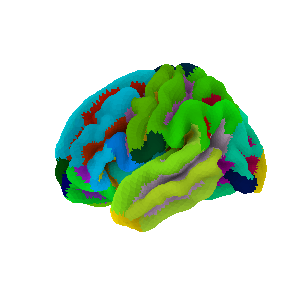

In [4]:
from nilearn import datasets, plotting

destrieux_atlas = datasets.fetch_atlas_surf_destrieux(verbose=0)
fsaverage = datasets.fetch_surf_fsaverage()
plotting.plot_surf_roi(fsaverage['pial_left'], roi_map=destrieux_atlas['map_left'],
                       hemi='left', view='lateral',
                       bg_map=fsaverage['sulc_left'], bg_on_data=True)
plotting.show()

```{tip}
Click on "Click to show" to reveal the python code used for visualizing the atlas. Visualization was done with the python package '[nilearn](https://nilearn.github.io/stable/index.html)'.
```

```{seealso}
Nilearn is a very powerful package for machin elearning with neuroimaging. Check out the nilearn [example gallery](https://nilearn.github.io/stable/auto_examples/index.html) to have a better impression.
```

## Dataframe slicing

You can get one or multiple columns from a dataframe by slicing it. Let's extract the age of the participants.

```{margin} Tip
The output of these commands are hidden by default, click to reveal.
```

In [5]:
df['Age']

0      35.800137
1      38.781656
2      46.710472
3      34.236824
4      24.284736
         ...    
633    47.723477
634    50.395619
635    42.989733
636    46.220397
637    41.741273
Name: Age, Length: 638, dtype: float64

Now let's slice the data frame to obtain ID, Age and the volume of the brain region called right superior frontal cortex and obtain the first 5 participants only.
To do so you must slice with a list of column names, that's whz we have double square brackets (outer: slicing, inner: list). Then we call head, to get the 'head' of the table.

In [6]:
df_superiorfrontal = df[['ID', 'Age', 'rh_superiorfrontal_volume']]
df_superiorfrontal.head(5)

,ID,Age,rh_superiorfrontal_volume
0,2,35.800137,21210
1,12,38.781656,24651
2,13,46.710472,23804
3,14,34.236824,21001
4,15,24.284736,21865


It is very easy to filter you data frame by the values of one of the columns.

In [7]:
df_superiorfrontal[df_superiorfrontal['Age']>30]

,ID,Age,rh_superiorfrontal_volume
0,2,35.800137,21210
1,12,38.781656,24651
2,13,46.710472,23804
3,14,34.236824,21001
5,16,55.167693,20534
...,...,...,...
633,648,47.723477,21427
634,651,50.395619,18137
635,652,42.989733,25113
636,653,46.220397,19449





## Plotting

Pandas dataframes provide build-in plotting functions.
Let's see how the age of the participants is distributed.

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

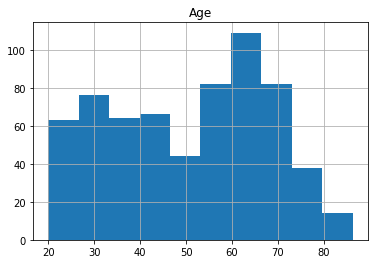

In [8]:
df.hist('Age')

Now, let's plot the volume of our previously selected brain region against age.

<AxesSubplot:xlabel='Age', ylabel='rh_superiorfrontal_volume'>

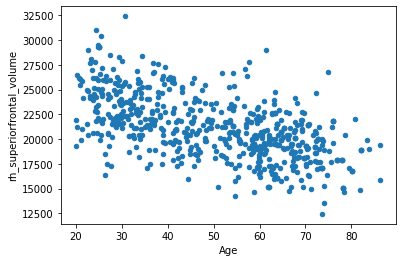

In [9]:
df.plot.scatter(x='Age', y='rh_superiorfrontal_volume')

Looks like an inverse association...
In the next section, we will see how we can take advantage of this single association in order to predict the age of a participant. And also how we can get into trouble when we want to improve the prediction by adding more regions.

```{seealso}
Pandas has an excellent leighweight ["Getting Started"](https://pandas.pydata.org/docs/getting_started/index.html) tutorial.
```

:::{admonition} Excercise 1.2
:class: tip, dropdown
Launch this notebook interactively in Google Colab (by clicking the rocket) and modify the code to plot out other variables, e.g. `rh_superiorfrontal_volume` vs. `lh_superiorfrontal_volume`.
:::

:::{admonition} Excercise 1.3
:class: tip, dropdown
Launch this notebook interactively in Google Colab (by clicking the rocket) and modify it to load in your own dataset.
You can directly upload your dataset file in colab (Select "Files" on the left) or you can also mount your google drive account.

Is you dataframe as Excel spreadsheet? No problem! Check out the function [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) in pandas.
:::